In [7]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

data = pd.read_csv('수난사고기후 분류2.csv')

In [8]:
# "기타 수난"으로 통합
exclude_accident = ["야영중 고립","인명구조","안전조치","선박조난","차량추락 침수","시설물침수","사체인양","선박","차량추락","수난기타"]
for i in range(len(data)):
    if data.loc[i,'사고'] in exclude_accident:
        data.loc[i,'사고'] = "기타 수난"

In [9]:
# 전, 중, 후 데이터 분리
preData = data[data['시점'] == "전"]
curData = data[data['시점'] == "중"]
fuData = data[data['시점'] == "후"]
del preData["시점"]
del curData["시점"]
del fuData["시점"]
del data["시점"]

In [10]:
accident = data['사고'].drop_duplicates()
news = data['기사'].drop_duplicates()

# 전체 시점의 사고와 기사 분석

In [35]:
#전처리
allData_summary = pd.DataFrame(dtype="float")
for i in accident:
    allData_summary = pd.concat([allData_summary,pd.DataFrame(list(data[data['사고'] == i]["기사"])).transpose()])
allData_summary.index = accident

In [36]:
allData_count = pd.DataFrame(columns=news)
for i in accident:
    for j in news:
        try:
            allData_count.loc[i,j] = round((allData_summary.loc[i].value_counts()[j]/len(data[data['사고']==i]))*100,2)
        except:
            allData_count.loc[i,j] = 0
allData_count


기사,폭풍,소낙눈,달무리,비,박무,연무,뇌전,소나기,소낙성진눈깨비,안개,황사,천둥,안개비,진눈깨비,눈
익수,4.76,6.35,0,49.21,23.81,3.17,0,9.52,1.59,1.59,0,0,0,0,0
기타 수난,2.33,1.67,0.33,40.67,40.33,3.67,2.33,3.0,0.33,1.67,2.67,0,0.33,0.67,0
자살기도,3.23,0,3.23,48.39,35.48,0,3.23,0,0,3.23,0,3.23,0,0,0
물놀이,0,0,0,33.33,33.33,16.67,0,8.33,0,0,0,0,8.33,0,0
무동력수상레져,0,0,0,60.0,30.0,10.0,0,0,0,0,0,0,0,0,0
시설물 침수,0,10.81,0,59.46,21.62,0,0,2.7,0,2.7,0,0,0,2.7,0
수상표류,0,0,0,53.85,7.69,0,0,0,0,23.08,0,0,0,7.69,7.69
물놀이 익수,0,0,0,62.5,31.25,0,0,0,0,0,6.25,0,0,0,0
어패류 채취 익수,0,0,0,66.67,33.33,0,0,0,0,0,0,0,0,0,0
계곡·급류사고,0,0,0,50.0,50.0,0,0,0,0,0,0,0,0,0,0


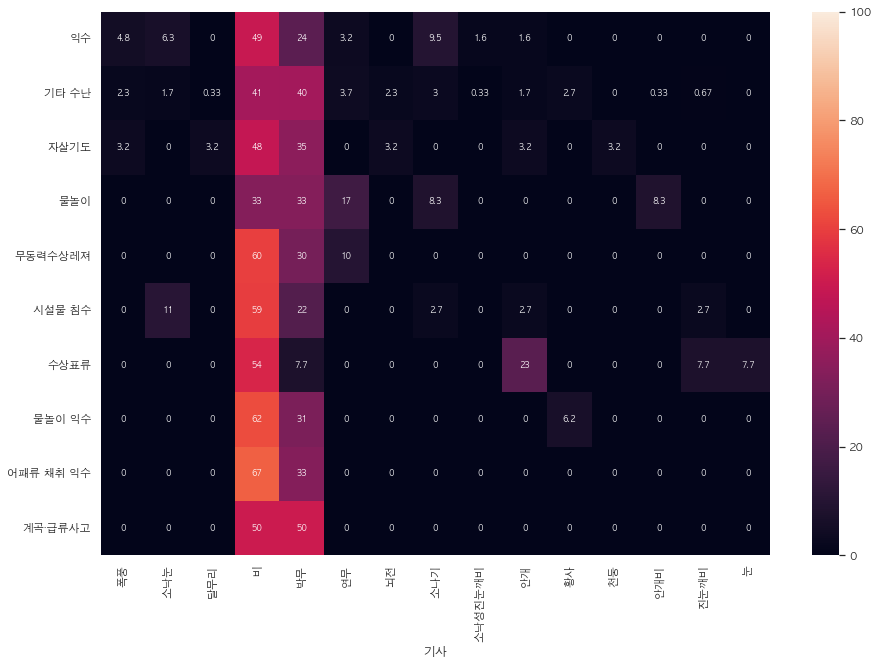

In [61]:
allData_count = allData_count.astype(float)
plt.rcParams['font.family'] = 'AppleGothic' #한글 깨짐
plt.figure(figsize = (15,10))
ax = sns.heatmap(allData_count, vmin=0, vmax=100, annot=True, annot_kws={"size":8})

## 전체 사고와 현상 분석

현상번호,소낙비,소낙눈,비,박무,안개,연무,천둥,황사,소낙성 진눈깨비,진눈깨비,눈,뇌전,이슬비
익수,12.24,10.20,36.73,30.61,4.08,0.00,0.00,0.00,2.04,0.00,0.00,0.00,4.08
기타 수난,2.59,1.29,40.52,44.83,2.59,2.16,0.43,2.16,0.43,0.43,0.00,0.86,1.72
자살기도,4.35,0.00,52.17,39.13,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,0.00
물놀이,14.29,0.00,42.86,14.29,28.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
무동력수상레져,0.00,0.00,66.67,33.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
시설물 침수,0.00,4.35,45.65,45.65,0.00,0.00,0.00,0.00,0.00,2.17,0.00,0.00,2.17
수상표류,0.00,0.00,44.44,33.33,11.11,0.00,0.00,0.00,0.00,0.00,11.11,0.00,0.00
물놀이 익수,0.00,0.00,60.00,20.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00
계곡·급류사고,0.00,0.00,50.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
어패류 채취 익수,0.00,0.00,66.67,33.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


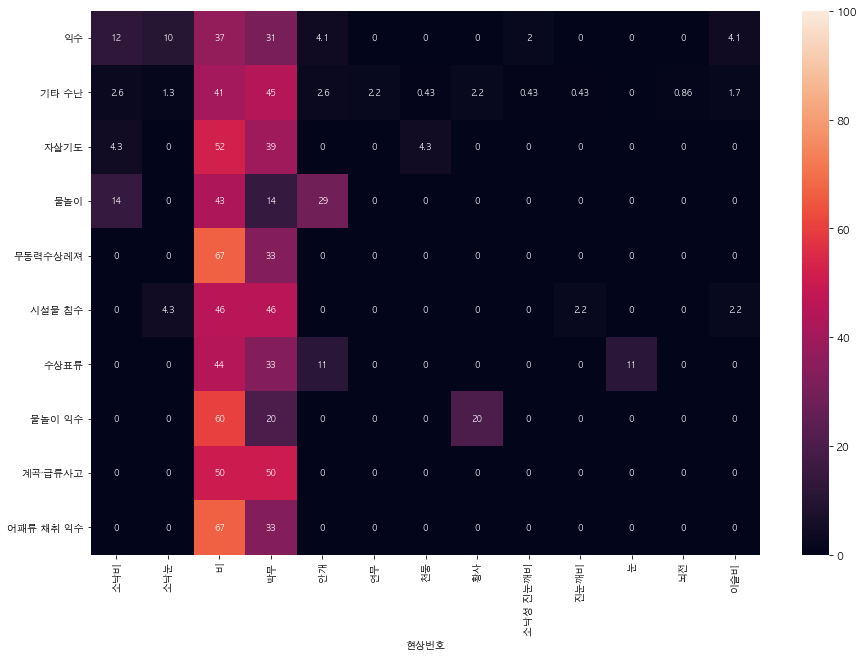

In [18]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

data = pd.read_csv('수난사고현상분류.csv')

# "기타 수난"으로 통합
exclude_accident = ["야영중 고립","인명구조","안전조치","선박조난","차량추락 침수","시설물침수","사체인양","선박","차량추락","수난기타"]
for i in range(len(data)):
    if data.loc[i,'acdnt_cause_asort_nm'] == "무동력수상레저":
        data.loc[i,'acdnt_cause_asort_nm'] == "무동력수상레져"
        
    if data.loc[i,'acdnt_cause_asort_nm'] in exclude_accident:
        data.loc[i,'acdnt_cause_asort_nm'] = "기타 수난"

accident = data['acdnt_cause_asort_nm'].drop_duplicates()
news = data['현상번호'].drop_duplicates()

#전처리
allData_summary = pd.DataFrame(dtype="float")
for i in accident:
    allData_summary = pd.concat([allData_summary,pd.DataFrame(list(data[data['acdnt_cause_asort_nm'] == i]["현상번호"])).transpose()])
allData_summary.index = accident

allData_count = pd.DataFrame(columns=news)
for i in accident:
    for j in news:
        try:
            allData_count.loc[i,j] = round((allData_summary.loc[i].value_counts()[j]/len(data[data['acdnt_cause_asort_nm']==i]))*100,2)
        except:
            allData_count.loc[i,j] = 0

allData_count = allData_count.astype(float)
plt.rcParams['font.family'] = 'AppleGothic' #한글 깨짐
plt.figure(figsize = (15,10))
ax = sns.heatmap(allData_count, vmin=0, vmax=100, annot=True, annot_kws={"size":8})

allData_count

## 사고 전 시점의 사고와 기사 분석

In [77]:
#전처리
preData_summary = pd.DataFrame()
for i in accident:
    if i not in list(preData['사고'].drop_duplicates()):
        preData_summary = pd.concat([preData_summary,pd.DataFrame([None for i in range(len(news))]).transpose()])
    else :
        preData_summary = pd.concat([preData_summary,pd.DataFrame(list(preData[preData['사고'] == i]["기사"])).transpose()])
         
preData_summary.index = accident

In [78]:
preData_count = pd.DataFrame(columns=news)
for i in accident:
    for j in news:
        try:
            preData_count.loc[i,j] = round((preData_summary.loc[i].value_counts()[j]/len(data[data['사고']==i]))*100,2)
        except:
            preData_count.loc[i,j] = 0
preData_count

기사,폭풍,소낙눈,달무리,비,박무,연무,뇌전,소나기,소낙성진눈깨비,안개,황사,천둥,안개비,진눈깨비,눈
익수,3.17,4.76,0,15.87,15.87,3.17,0,3.17,1.59,1.59,0,0,0,0,0
기타 수난,0.33,0.67,0,11.67,19.67,2.0,1.67,2.0,0.33,1.0,1.0,0,0,0.33,0
자살기도,3.23,0,0,9.68,9.68,0,0,0,0,3.23,0,0,0,0,0
물놀이,0,0,0,16.67,25.0,8.33,0,0,0,0,0,0,0,0,0
무동력수상레져,0,0,0,10.0,10.0,10.0,0,0,0,0,0,0,0,0,0
시설물 침수,0,5.41,0,5.41,2.7,0,0,0,0,0,0,0,0,2.7,0
수상표류,0,0,0,23.08,7.69,0,0,0,0,7.69,0,0,0,0,0
물놀이 익수,0,0,0,6.25,12.5,0,0,0,0,0,6.25,0,0,0,0
어패류 채취 익수,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
계곡·급류사고,0,0,0,0,16.67,0,0,0,0,0,0,0,0,0,0


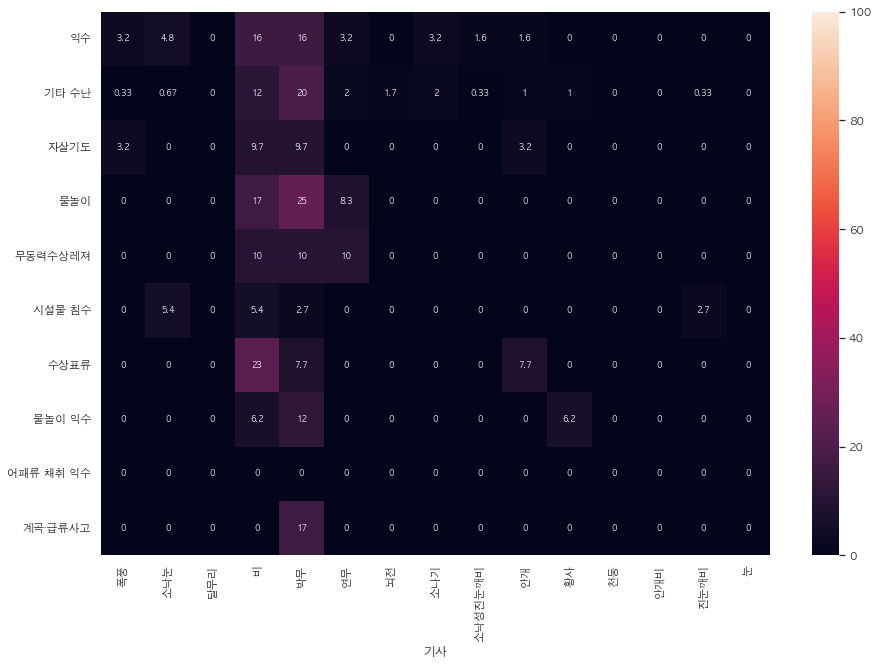

In [79]:
preData_count = preData_count.astype(float)
plt.rcParams['font.family'] = 'AppleGothic' #한글 깨짐
plt.figure(figsize = (15,10))
ax = sns.heatmap(preData_count, vmin=0, vmax=100, annot=True, annot_kws={"size":8})

# 사고 중 시점의 사고와 기사 분석

In [71]:
#전처리
curData_summary = pd.DataFrame()
for i in accident:
    if i not in list(curData['사고'].drop_duplicates()):
        curData_summary = pd.concat([curData_summary,pd.DataFrame([None for i in range(len(news))]).transpose()])
    else :
        curData_summary = pd.concat([curData_summary,pd.DataFrame(list(curData[curData['사고'] == i]["기사"])).transpose()])
         
curData_summary.index = accident

In [72]:
curData_count = pd.DataFrame(columns=news)
for i in accident:
    for j in news:
        try:
            curData_count.loc[i,j] = round((curData_summary.loc[i].value_counts()[j]/len(data[data['사고']==i]))*100,2)
        except:
            curData_count.loc[i,j] = 0
curData_count

기사,폭풍,소낙눈,달무리,비,박무,연무,뇌전,소나기,소낙성진눈깨비,안개,황사,천둥,안개비,진눈깨비,눈
익수,0,1.59,0,17.46,4.76,0,0,4.76,0,0,0,0,0,0,0
기타 수난,1.67,0.33,0,17.67,16.67,1.0,0.33,0.33,0,0.33,1.33,0,0.33,0.33,0
자살기도,0,0,3.23,29.03,16.13,0,0,0,0,0,0,0,0,0,0
물놀이,0,0,0,16.67,8.33,8.33,0,0,0,0,0,0,0,0,0
무동력수상레져,0,0,0,30.0,20.0,0,0,0,0,0,0,0,0,0,0
시설물 침수,0,2.7,0,43.24,18.92,0,0,2.7,0,2.7,0,0,0,0,0
수상표류,0,0,0,30.77,0,0,0,0,0,7.69,0,0,0,7.69,0
물놀이 익수,0,0,0,12.5,0,0,0,0,0,0,0,0,0,0,0
어패류 채취 익수,0,0,0,33.33,33.33,0,0,0,0,0,0,0,0,0,0
계곡·급류사고,0,0,0,50.0,33.33,0,0,0,0,0,0,0,0,0,0


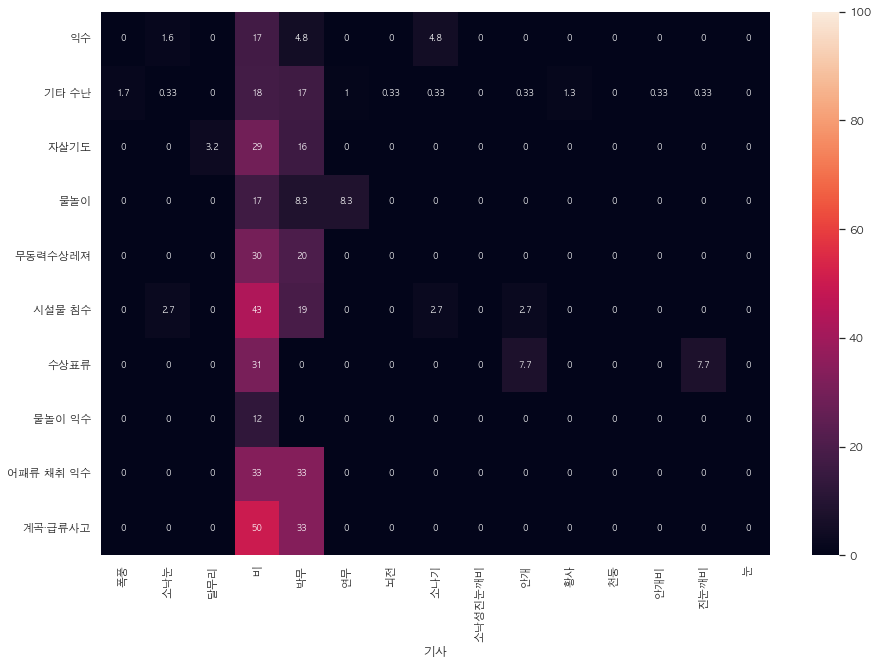

In [73]:
curData_count = curData_count.astype(float)
plt.rcParams['font.family'] = 'AppleGothic' #한글 깨짐
plt.figure(figsize = (15,10))

ax = sns.heatmap(curData_count, vmin=0, vmax=100, annot=True, annot_kws={"size":8})

# 사고 후 시점의 사고와 기사 분석

In [74]:
#전처리
fuData_summary = pd.DataFrame()
for i in accident:
    if i not in list(fuData['사고'].drop_duplicates()):
        fuData_summary = pd.concat([fuData_summary,pd.DataFrame([None for i in range(len(news))]).transpose()])
    else :
        fuData_summary = pd.concat([fuData_summary,pd.DataFrame(list(fuData[fuData['사고'] == i]["기사"])).transpose()])
         
fuData_summary.index = accident

In [75]:
fuData_count = pd.DataFrame(columns=news)
for i in accident:
    for j in news:
        try:
            fuData_count.loc[i,j] = round((fuData_summary.loc[i].value_counts()[j]/len(data[data['사고']==i]))*100,2)
        except:
            fuData_count.loc[i,j] = 0
fuData_count

기사,폭풍,소낙눈,달무리,비,박무,연무,뇌전,소나기,소낙성진눈깨비,안개,황사,천둥,안개비,진눈깨비,눈
익수,1.59,0,0,15.87,3.17,0,0,1.59,0,0,0,0,0,0,0
기타 수난,0.33,0.67,0.33,11.33,4.0,0.67,0.33,0.67,0,0.33,0.33,0,0,0,0
자살기도,0,0,0,9.68,9.68,0,3.23,0,0,0,0,3.23,0,0,0
물놀이,0,0,0,0,0,0,0,8.33,0,0,0,0,8.33,0,0
무동력수상레져,0,0,0,20.0,0,0,0,0,0,0,0,0,0,0,0
시설물 침수,0,2.7,0,10.81,0,0,0,0,0,0,0,0,0,0,0
수상표류,0,0,0,0,0,0,0,0,0,7.69,0,0,0,0,7.69
물놀이 익수,0,0,0,43.75,18.75,0,0,0,0,0,0,0,0,0,0
어패류 채취 익수,0,0,0,33.33,0,0,0,0,0,0,0,0,0,0,0
계곡·급류사고,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


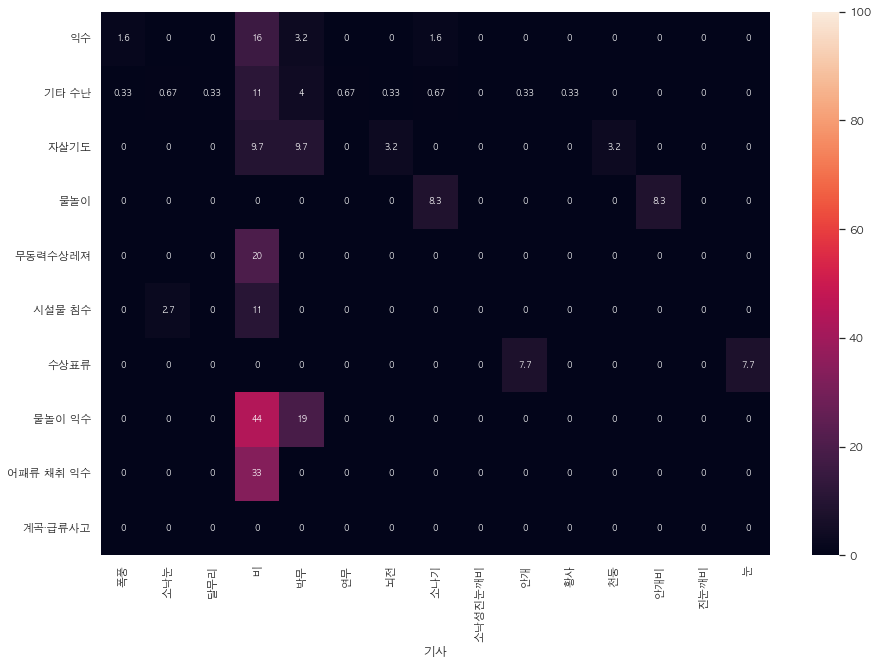

In [76]:
fuData_count = fuData_count.astype(float)
plt.rcParams['font.family'] = 'AppleGothic' #한글 깨짐
plt.figure(figsize = (15,10))
ax = sns.heatmap(fuData_count, vmin=0, vmax=100, annot=True, annot_kws={"size":8})